In [1]:
# Packages for analysis
import pandas as pd
import numpy as np
import os
from sklearn import svm


# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
pwd

'/home/nbuser/library'

In [3]:
# Read in VIPQ data
system_data_full_data = pd.read_csv('Full DataCSV.csv')

In [4]:
system_data_full_data

,Type,Voltage,Current,Power,Reactive P,Neigh Voltage,Neight Current,Neigh Power,Neigh Reactive P,Sample
0,Open,13669.46314,0.013659,577.564780,-0.304013,13660.24426,2.059956,88352.95836,47485.17493,1
1,Open,13688.09990,0.013677,578.962174,-0.310248,13678.96107,2.041986,87680.86038,47131.31630,2
2,Open,13706.82820,0.013696,580.365886,-0.316524,13697.76973,2.024009,87001.81565,46775.85255,3
3,Open,13725.75935,0.013715,581.775428,-0.322836,13716.78144,2.006061,86320.81300,46420.34952,4
4,Open,13744.67150,0.013734,583.190902,-0.329185,13735.77437,1.987927,85635.34386,46061.15389,5
5,Open,13763.53327,0.013753,584.612659,-0.335565,13754.71713,1.969754,84949.01494,45697.87380,6
6,Open,13782.68036,0.013772,586.039850,-0.341973,13773.94540,1.951541,84256.76227,45333.64350,7
7,Open,13801.67712,0.013791,587.474313,-0.348406,13793.02370,1.933397,83564.51927,44969.55124,8
8,Open,13820.77292,0.013810,588.915028,-0.354860,13812.20132,1.915199,82866.59973,44600.58232,9
9,Open,13840.13069,0.013830,590.361143,-0.361331,13831.64103,1.896773,82163.67041,44228.55062,10


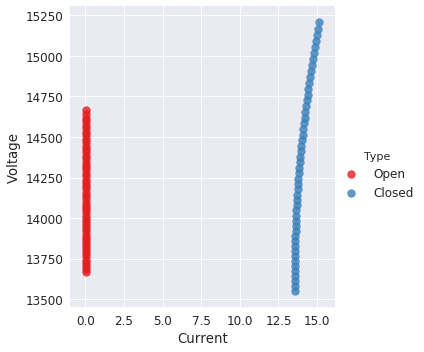

In [10]:
# Plot 2 Voltages
sns.lmplot('Current', 'Voltage', data=system_data_full_data, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.figure(figsize=(15,15))
plt.show()

In [ ]:
# Specify inputs for the model
# ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].as_matrix()
ingredients = recipes[['Flour','Sugar']].as_matrix()
type_label = np.where(recipes['Type']=='Muffin', 0, 1)

# Feature names
recipe_features = recipes.columns.values[1:].tolist()
recipe_features